In [6]:
import quantecon as qe
import numpy as np
from scipy import linalg
Q = [[-0.1,0.1],[0.4,-0.4]]
P = linalg.expm(Q)
print(P)
#generate probability matrix from the transition matrix

[[0.92130613 0.07869387]
 [0.31477547 0.68522453]]


In [7]:
import pandas as ps
ff = open('Compare3.csv', 'r')
yields = ps.read_csv('Compare3.csv')
print(yields.head())

    Kvar_Good    Kvar_Bad  KvarR_Good   KvarR_Bad   Con_Good    Con_Bad
0  184.748666  100.090624  183.419525  105.343590  89.066575  51.540978
1  135.808700   74.084879  134.874877   77.823299  89.066575  51.540978
2  120.779125   66.612284  119.932732   70.009430  89.066575  51.540978
3  113.469474   63.066819  112.658254   66.324174  89.066575  51.540978
4  109.145279   60.996868  108.352400   64.180254  89.066575  51.540978


In [30]:
#def Semi_mc(P): 
mc = qe.MarkovChain(P, state_values=(0, 1))
Status = mc.simulate(ts_length=10000, init=0)
#print(Status)
Kvar = np.zeros(50)
#KK = []
for s in Status:
    if s == 0:
        K = yields['Kvar_Good'];
    else:
        K = yields['Kvar_Bad'];
    #KK.append(K)
    Kvar += K
    

#return Kvar/len(Status) 
print(Kvar/len(Status))
#print(KK)

0     167.673139
1     123.359005
2     109.853673
3     103.303258
4      99.433745
5      96.878498
6      95.065017
7      93.711202
8      92.661922
9      91.824799
10     91.141391
11     90.572916
12     90.092629
13     89.681484
14     89.325553
15     89.014413
16     88.740109
17     88.496465
18     88.278613
19     88.082662
20     87.905468
21     87.744461
22     87.597520
23     87.462878
24     87.339054
25     87.224793
26     87.119030
27     87.020849
28     86.929465
29     86.844195
30     86.764444
31     86.689695
32     86.619490
33     86.553428
34     86.491153
35     86.432347
36     86.376729
37     86.324047
38     86.274073
39     86.226605
40     86.181459
41     86.138467
42     86.097480
43     86.058361
44     86.020984
45     85.985236
46     85.951013
47     85.918219
48     85.886766
49     85.856574
Name: Kvar_Good, dtype: float64


In [9]:
ff = open('compare.csv', 'r')
compare = ps.read_csv('compare.csv')
print(compare.head())

   Kvar_S   Kvar_D  Kvar_C  AF
0  205.02  241.684   74.63   5
1  142.93  163.799   74.63  10
2  123.67  137.298   74.63  15
3  114.27  123.904   74.63  20
4  108.69  115.817   74.63  25


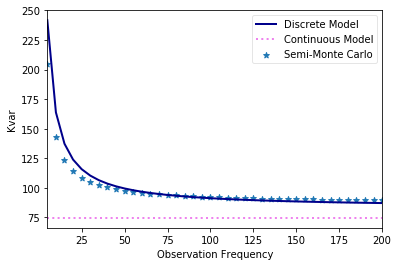

In [11]:
import matplotlib.pyplot as plt
X = np.linspace(5,200,40)
fig, ax = plt.subplots(1)
ax.scatter(X, compare['Kvar_S'], marker='*',label='Semi-Monte Carlo')
# #ax.plot(X, K_c[0], color='green',label='Continuous Kvar without jump')
ax.plot(X, compare['Kvar_D'], color='darkblue',linestyle='solid', \
         linewidth=2,ms=5,label='Discrete Model')
# #ax.plot(X, K_c[0], color='green',label='Continuous Kvar without jump')
ax.plot(X, compare['Kvar_C'], color='violet', linestyle=':', \
         linewidth=2,ms=5,label='Continuous Model')

ax.set_xlim(5, 200)
plt.xlabel('Observation Frequency')
plt.ylabel('Kvar')
ax.legend(fancybox=True, framealpha=0.5)

# plt.title("Simple Plot")

plt.savefig('Compare_methods.pdf', format='pdf', dpi=1000)
plt.show()